In [73]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pymc3 as pm
import arviz as az

sns.set()

In [74]:

nr_samples = 10
inside = np.array([23,19,23,19,23,19,23,19,23,19])
                                    
outside = np.array([-20,-20,-15,-15,-10,-10,-8,-8,-4,-4])

print (inside)
print (outside)

e = (2 * inside) ** 2 + outside ** 2 + inside * -outside
print (e)

[23 19 23 19 23 19 23 19 23 19]
[-20 -20 -15 -15 -10 -10  -8  -8  -4  -4]
[2976 2224 2686 1954 2446 1734 2364 1660 2224 1536]


In [75]:
df = pd.DataFrame({'out': outside,
                  'in' : inside,
                  'e' : e})

dates = pd.date_range('2020-01-01',periods=len(df))
df.index = dates
df

,out,in,e
2020-01-01,-20,23,2976
2020-01-02,-20,19,2224
2020-01-03,-15,23,2686
2020-01-04,-15,19,1954
2020-01-05,-10,23,2446
2020-01-06,-10,19,1734
2020-01-07,-8,23,2364
2020-01-08,-8,19,1660
2020-01-09,-4,23,2224
2020-01-10,-4,19,1536


Text(0, 0.5, 'temp [inside,outside]')

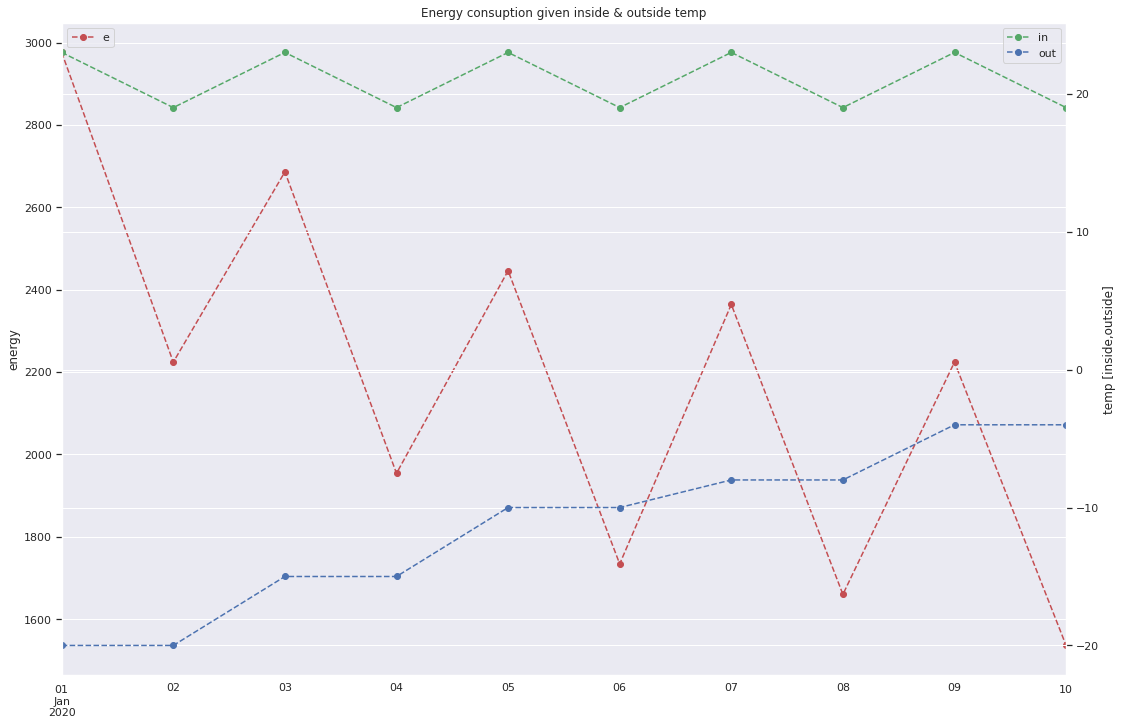

In [76]:
ax=df.plot(y='e',style='ro--',figsize=(18,12),
           title='Energy consuption given inside & outside temp')
ax2 = plt.twinx()

df[['in','out']].plot(ax=ax2,style=['go--','bo--'])

ax.legend(loc='upper left')
ax.set_ylabel('energy')

ax2.legend(loc='upper right')
ax2.set_ylabel('temp [inside,outside]')

In [77]:
df.corr()

,out,in,e
out,1.000000,0.000000,-0.574218
in,0.000000,1.000000,0.816032
e,-0.574218,0.816032,1.000000


In [78]:

def standardize(series):
    return (series - series.mean()) / series.std()

df[['out_std','in_std','e_std']] = df.apply(standardize)
df['day_idx'] = range(len(df))
df['country_idx'] = 0
df['isolation_idx'] = 0
df

,out,in,e,out_std,in_std,e_std,day_idx,country_idx,isolation_idx
2020-01-01,-20,23,2976,-1.464397,0.948683,1.716606,0,0,0
2020-01-02,-20,19,2224,-1.464397,-0.948683,0.094072,1,0,0
2020-01-03,-15,23,2686,-0.613003,0.948683,1.090895,2,0,0
2020-01-04,-15,19,1954,-0.613003,-0.948683,-0.488486,3,0,0
2020-01-05,-10,23,2446,0.238390,0.948683,0.573065,4,0,0
2020-01-06,-10,19,1734,0.238390,-0.948683,-0.963164,5,0,0
2020-01-07,-8,23,2364,0.578948,0.948683,0.396140,6,0,0
2020-01-08,-8,19,1660,0.578948,-0.948683,-1.122828,7,0,0
2020-01-09,-4,23,2224,1.260063,0.948683,0.094072,8,0,0
2020-01-10,-4,19,1536,1.260063,-0.948683,-1.390373,9,0,0


In [79]:
df2 = df.copy()
df2['country_idx'] = 1
df2['isolation_idx'] = 1
df2['e'] = df2['e'] * 1.1
df2['e_std'] = standardize(df2['e'])

In [80]:
df2

,out,in,e,out_std,in_std,e_std,day_idx,country_idx,isolation_idx
2020-01-01,-20,23,3273.6,-1.464397,0.948683,1.716606,0,1,1
2020-01-02,-20,19,2446.4,-1.464397,-0.948683,0.094072,1,1,1
2020-01-03,-15,23,2954.6,-0.613003,0.948683,1.090895,2,1,1
2020-01-04,-15,19,2149.4,-0.613003,-0.948683,-0.488486,3,1,1
2020-01-05,-10,23,2690.6,0.238390,0.948683,0.573065,4,1,1
2020-01-06,-10,19,1907.4,0.238390,-0.948683,-0.963164,5,1,1
2020-01-07,-8,23,2600.4,0.578948,0.948683,0.396140,6,1,1
2020-01-08,-8,19,1826.0,0.578948,-0.948683,-1.122828,7,1,1
2020-01-09,-4,23,2446.4,1.260063,0.948683,0.094072,8,1,1
2020-01-10,-4,19,1689.6,1.260063,-0.948683,-1.390373,9,1,1


In [81]:
df_all = pd.concat([df,df2])
df_all

,out,in,e,out_std,in_std,e_std,day_idx,country_idx,isolation_idx
2020-01-01,-20,23,2976.0,-1.464397,0.948683,1.716606,0,0,0
2020-01-02,-20,19,2224.0,-1.464397,-0.948683,0.094072,1,0,0
2020-01-03,-15,23,2686.0,-0.613003,0.948683,1.090895,2,0,0
2020-01-04,-15,19,1954.0,-0.613003,-0.948683,-0.488486,3,0,0
2020-01-05,-10,23,2446.0,0.238390,0.948683,0.573065,4,0,0
2020-01-06,-10,19,1734.0,0.238390,-0.948683,-0.963164,5,0,0
2020-01-07,-8,23,2364.0,0.578948,0.948683,0.396140,6,0,0
2020-01-08,-8,19,1660.0,0.578948,-0.948683,-1.122828,7,0,0
2020-01-09,-4,23,2224.0,1.260063,0.948683,0.094072,8,0,0
2020-01-10,-4,19,1536.0,1.260063,-0.948683,-1.390373,9,0,0


Text(0, 0.5, 'energy')

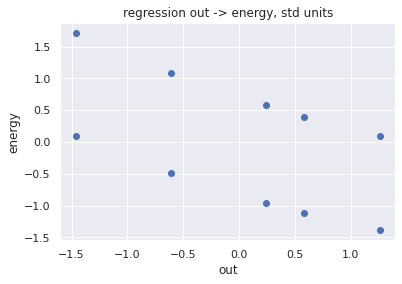

In [82]:
plt.scatter(df['out_std'],df['e_std'])
plt.title('regression out -> energy, std units')
plt.xlabel('out')
plt.ylabel('energy')

In [83]:
# model 1 single regression outside temp -> energy

x = df['out_std'].values

model1 = pm.Model()

result = pd.DataFrame()

with model1:
    alpha = pm.Normal('alpha',mu=0,sd=1)
    beta = pm.Normal('beta',mu=0,sd=1)
    obs_sigma = pm.Exponential('obs_sigma',1)
    
    reg = alpha + x * beta
    lkh = pm.Normal('lkh',mu=reg,sd=obs_sigma,observed=df['e_std'])
    
    trace = pm.sample(500,tune=500)
    
    result = pm.trace_to_dataframe(trace)
    
    
    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [obs_sigma, beta, alpha]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 1 seconds.


In [84]:
result

,alpha,beta,obs_sigma
0,0.044273,-0.874676,1.023446
1,0.573991,-0.814465,0.844357
2,-0.521474,-0.930713,1.044657
3,-0.059892,-0.351773,1.053527
4,-0.059892,-0.351773,1.053527
...,...,...,...
995,0.069570,-0.815187,1.379091
996,-0.396581,-0.870176,0.802357
997,0.403728,-0.559058,0.882139
998,-0.456201,-0.587272,0.825155


            mean     sd  hdi_5.5%  hdi_94.5%  mcse_mean  mcse_sd  ess_mean  \
alpha     -0.013  0.281    -0.456      0.422      0.010    0.009     787.0   
beta      -0.518  0.315    -1.021     -0.031      0.011    0.009     764.0   
obs_sigma  0.947  0.249     0.582      1.298      0.011    0.008     524.0   

           ess_sd  ess_bulk  ess_tail  r_hat  
alpha       481.0     807.0     540.0    1.0  
beta        652.0     830.0     524.0    1.0  
obs_sigma   524.0     505.0     345.0    1.0  


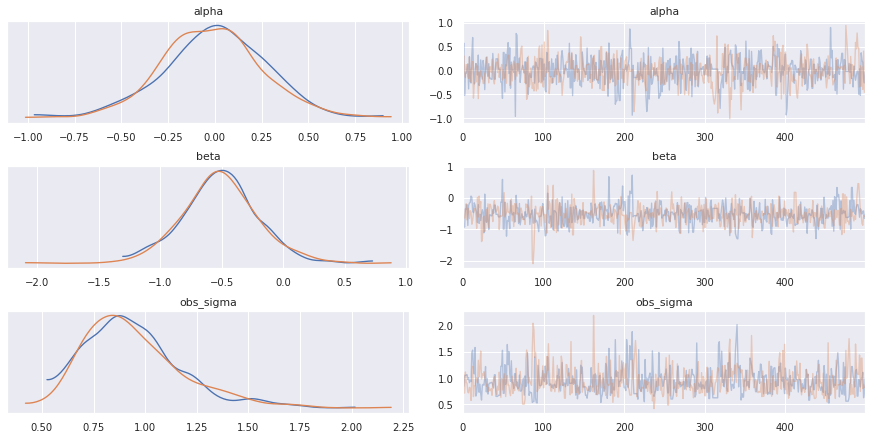

In [85]:
summary = pd.DataFrame()

with model1:
    az.plot_trace(trace)
    summary = az.summary(trace,hdi_prob=0.89)
    print (summary)

In [86]:
with model1:

    print (az.summary(trace,hdi_prob=0.89))
    


            mean     sd  hdi_5.5%  hdi_94.5%  mcse_mean  mcse_sd  ess_mean  \
alpha     -0.013  0.281    -0.456      0.422      0.010    0.009     787.0   
beta      -0.518  0.315    -1.021     -0.031      0.011    0.009     764.0   
obs_sigma  0.947  0.249     0.582      1.298      0.011    0.008     524.0   

           ess_sd  ess_bulk  ess_tail  r_hat  
alpha       481.0     807.0     540.0    1.0  
beta        652.0     830.0     524.0    1.0  
obs_sigma   524.0     505.0     345.0    1.0  


In [87]:
nr_rows = 1000

X = np.linspace(df['out_std'].min(),df['out_std'].max(),100)

rows = np.random.choice(result.index,replace=True,size=nr_rows)

lines = np.array([result.iloc[rows]['alpha'] + result.iloc[rows]['beta'] * X[i] for i in range(len(X))])



/usr/local/lib/python3.8/site-packages/arviz/stats/stats.py:483: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(


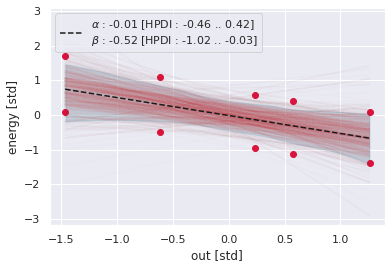

In [88]:
_= plt.plot(X,lines,color='r',alpha=0.01)

ax = plt.gca()

label_1 = r'$\alpha$ : {:.2f} [HPDI : {:.2f} .. {:.2f}]'.format(summary.loc['alpha','mean'],
                                                                summary.loc['alpha','hdi_5.5%'],
                                                                summary.loc['alpha','hdi_94.5%'])

label_2 = r'$\beta$ : {:.2f} [HPDI : {:.2f} .. {:.2f}]'.format(summary.loc['beta','mean'],
                                                              summary.loc['beta','hdi_5.5%'],
                                                              summary.loc['beta','hdi_94.5%'])

_= plt.plot(X,result['alpha'].mean() + result['beta'].mean() * X,
            color='k',ls='dashed',label=label_1 + '\n' + label_2)

plt.xlabel('out [std]')
plt.ylabel('energy [std]')

plt.legend(loc='upper left')

fill_kwargs = {'alpha': 0.3}
az.plot_hpd(X, lines.T,ax=ax,color='c',fill_kwargs=fill_kwargs,hdi_prob=0.89)

plt.scatter(df['out_std'],df['e_std'],color='crimson')

In [89]:
# model_2 indoor --> energy

x = df['in_std'].values

model_2 = pm.Model()
with model_2:
    
    alpha = pm.Normal('alpha',0,1)
    beta = pm.Normal('beta',0,1)
    obs_sigma = pm.Exponential('obs_sigma',1)
    
    reg = alpha + x * beta
    
    lkh = pm.Normal('lkh',reg,obs_sigma,observed=df['e_std'])
    
    trace = pm.sample(500,tune=500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [obs_sigma, beta, alpha]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 1 seconds.


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alpha,0.000,0.212,-0.314,0.323,0.008,0.007,787.0,425.0,783.0,644.0,1.00
beta,0.772,0.229,0.362,1.096,0.008,0.006,808.0,770.0,823.0,607.0,1.01
obs_sigma,0.681,0.197,0.394,0.933,0.008,0.006,668.0,584.0,796.0,595.0,1.00


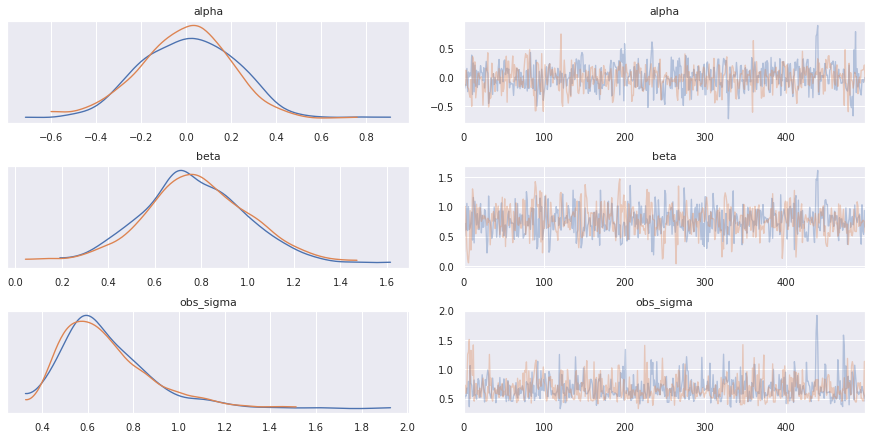

In [90]:
summary = pd.DataFrame()
result = pd.DataFrame()


with model_2:
    result = pm.trace_to_dataframe(trace)
    az.plot_trace(trace)
    summary = az.summary(trace,hdi_prob=0.89)

summary

In [91]:
result.describe()

,alpha,beta,obs_sigma
count,1000.000000,1000.000000,1000.000000
mean,0.000374,0.771679,0.680928
std,0.212022,0.229133,0.197158
min,-0.715902,0.043276,0.328389
25%,-0.142613,0.630245,0.545179
50%,0.005896,0.760127,0.636029
75%,0.143504,0.917564,0.774090
max,0.909523,1.615670,1.926241


In [92]:
rows = np.random.choice(result.index,replace=True,size=nr_rows)

lines = np.array([result.iloc[rows]['alpha'] + result.iloc[rows]['beta'] * X[i] for i in range(len(X))])

/usr/local/lib/python3.8/site-packages/arviz/stats/stats.py:483: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(


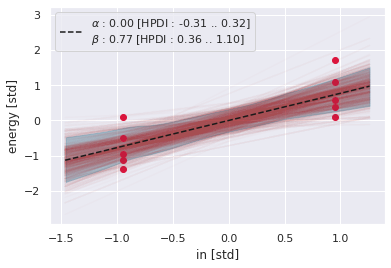

In [93]:
_= plt.plot(X,lines,color='r',alpha=0.02)

ax = plt.gca()

label_1 = r'$\alpha$ : {:.2f} [HPDI : {:.2f} .. {:.2f}]'.format(summary.loc['alpha','mean'],
                                                                summary.loc['alpha','hdi_5.5%'],
                                                                summary.loc['alpha','hdi_94.5%'])

label_2 = r'$\beta$ : {:.2f} [HPDI : {:.2f} .. {:.2f}]'.format(summary.loc['beta','mean'],
                                                              summary.loc['beta','hdi_5.5%'],
                                                              summary.loc['beta','hdi_94.5%'])

_= plt.plot(X,result['alpha'].mean() + result['beta'].mean() * X,
            color='k',ls='dashed',label=label_1 + '\n' + label_2)

plt.xlabel('in [std]')
plt.ylabel('energy [std]')

plt.legend(loc='upper left')

fill_kwargs = {'alpha': 0.5}
az.plot_hpd(X, lines.T,ax=ax,color='c',fill_kwargs=fill_kwargs,hdi_prob=0.89)

plt.scatter(df['in_std'],df['e_std'],color='crimson')

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [obs_sigma, beta, alpha]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 2 seconds.


            mean     sd  hdi_5.5%  hdi_94.5%  mcse_mean  mcse_sd  ess_mean  \
alpha      0.000  0.030    -0.047      0.046      0.001    0.001     944.0   
beta[0]   -0.574  0.031    -0.619     -0.523      0.001    0.001     724.0   
beta[1]    0.816  0.033     0.766      0.861      0.001    0.001     706.0   
obs_sigma  0.092  0.031     0.051      0.132      0.001    0.001     452.0   

           ess_sd  ess_bulk  ess_tail  r_hat  
alpha       555.0     957.0     714.0   1.00  
beta[0]     724.0     765.0     491.0   1.00  
beta[1]     706.0     791.0     526.0   1.01  
obs_sigma   444.0     510.0     630.0   1.01  


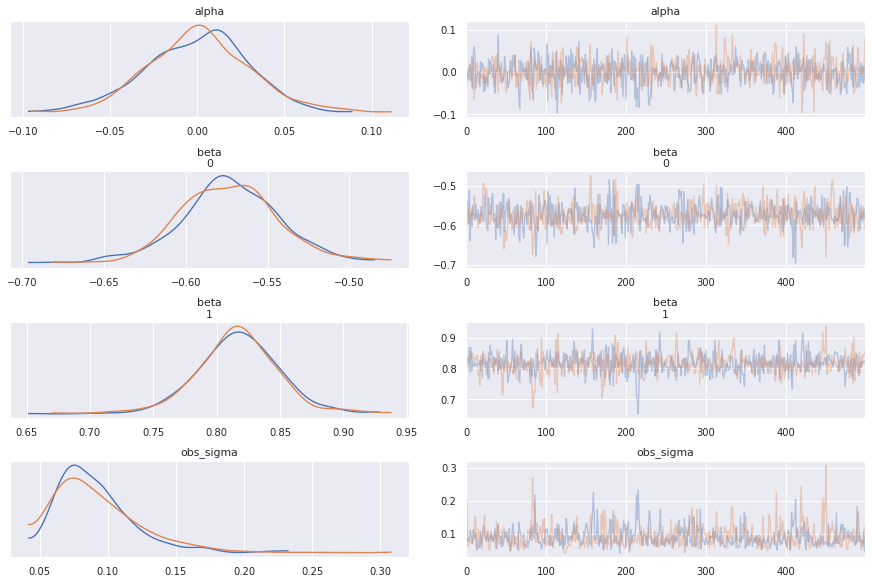

In [94]:
#model 3 : multi-regression {in,out} --> energy

result = pd.DataFrame()
summary = pd.DataFrame()

x0 = df['out_std']
x1 = df['in_std']

model_3 = pm.Model()
with model_3:
    
    alpha = pm.Normal('alpha',0,1)
    beta = pm.Normal('beta',0,1,shape=2)
    obs_sigma = pm.Exponential('obs_sigma',1)
    
    reg = alpha + beta[0] * x0 + beta[1] * x1
    
    lkh = pm.Normal('lkh',reg,obs_sigma,observed=df['e_std'])
    
    trace = pm.sample(500,tune=500)
    
    result = pm.trace_to_dataframe(trace)
    
    summary = az.summary(trace,hdi_prob=0.89)
    
    print (summary)
    az.plot_trace(trace)

In [95]:
result.describe()

,alpha,beta__0,beta__1,obs_sigma
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.000089,-0.573597,0.815908,0.091775
std,0.029660,0.030748,0.032661,0.031326
min,-0.096937,-0.696381,0.651435,0.041816
25%,-0.018789,-0.592753,0.797005,0.070296
50%,0.000813,-0.574659,0.816050,0.085291
75%,0.019385,-0.554542,0.834904,0.105867
max,0.111194,-0.474418,0.937685,0.307815


In [96]:
rows = np.random.choice(result.index,replace=True,size=nr_rows)

lines = np.array([result.iloc[rows]['alpha'] + result.iloc[rows]['beta__0'] * X[i] \
                  + result.iloc[rows]['beta__1'] * X[i] for i in range(len(X))])

In [97]:
summary

,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alpha,0.000,0.030,-0.047,0.046,0.001,0.001,944.0,555.0,957.0,714.0,1.00
beta[0],-0.574,0.031,-0.619,-0.523,0.001,0.001,724.0,724.0,765.0,491.0,1.00
beta[1],0.816,0.033,0.766,0.861,0.001,0.001,706.0,706.0,791.0,526.0,1.01
obs_sigma,0.092,0.031,0.051,0.132,0.001,0.001,452.0,444.0,510.0,630.0,1.01


/usr/local/lib/python3.8/site-packages/arviz/stats/stats.py:483: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(


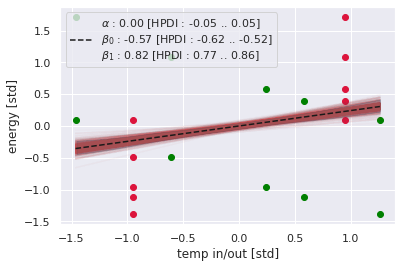

In [98]:
_= plt.plot(X,lines,color='r',alpha=0.02)

ax = plt.gca()

label_1 = r'$\alpha$ : {:.2f} [HPDI : {:.2f} .. {:.2f}]'.format(summary.loc['alpha','mean'],
                                                                summary.loc['alpha','hdi_5.5%'],
                                                                summary.loc['alpha','hdi_94.5%'])

label_2 = r'$\beta_0$ : {:.2f} [HPDI : {:.2f} .. {:.2f}]'.format(summary.loc['beta[0]','mean'],
                                                              summary.loc['beta[0]','hdi_5.5%'],
                                                              summary.loc['beta[0]','hdi_94.5%'])

label_3 = r'$\beta_1$ : {:.2f} [HPDI : {:.2f} .. {:.2f}]'.format(summary.loc['beta[1]','mean'],
                                                              summary.loc['beta[1]','hdi_5.5%'],
                                                              summary.loc['beta[1]','hdi_94.5%'])


_= plt.plot(X,result['alpha'].mean() + result['beta__0'].mean() * X + result['beta__1'].mean() * X,
            color='k',ls='dashed',label=label_1 + '\n' + label_2 + '\n' + label_3)

plt.xlabel('temp in/out [std]')
plt.ylabel('energy [std]')

plt.legend(loc='upper left')

fill_kwargs = {'alpha': 0.5}
az.plot_hpd(X, lines.T,ax=ax,color='c',fill_kwargs=fill_kwargs,hdi_prob=0.89)

plt.scatter(df['in_std'],df['e_std'],color='crimson')
plt.scatter(df['out_std'],df['e_std'],color='green')

In [99]:
df_all[['out_std','in_std','e_std']] = df_all[['out','in','e']].apply(standardize)
df_all


,out,in,e,out_std,in_std,e_std,day_idx,country_idx,isolation_idx
2020-01-01,-20,23,2976.0,-1.504525,0.974679,1.409189,0,0,0
2020-01-02,-20,19,2224.0,-1.504525,-0.974679,-0.134273,1,0,0
2020-01-03,-15,23,2686.0,-0.629801,0.974679,0.813971,2,0,0
2020-01-04,-15,19,1954.0,-0.629801,-0.974679,-0.688441,3,0,0
2020-01-05,-10,23,2446.0,0.244923,0.974679,0.321377,4,0,0
2020-01-06,-10,19,1734.0,0.244923,-0.974679,-1.139986,5,0,0
2020-01-07,-8,23,2364.0,0.594812,0.974679,0.153074,6,0,0
2020-01-08,-8,19,1660.0,0.594812,-0.974679,-1.291869,7,0,0
2020-01-09,-4,23,2224.0,1.294591,0.974679,-0.134273,8,0,0
2020-01-10,-4,19,1536.0,1.294591,-0.974679,-1.546376,9,0,0


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [obs_sigma, beta, alpha]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 2 seconds.


          alpha__0     alpha__1    beta__0_0    beta__0_1    beta__1_0  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     -0.223269     0.223554    -0.531657    -0.583436     0.755497   
std       0.025722     0.024743     0.025631     0.026635     0.027546   
min      -0.322473     0.148055    -0.608504    -0.680454     0.660915   
25%      -0.239064     0.208512    -0.548928    -0.600455     0.739035   
50%      -0.222599     0.224001    -0.531113    -0.583227     0.754724   
75%      -0.206878     0.239541    -0.514961    -0.566394     0.773228   
max      -0.146074     0.298836    -0.452973    -0.446074     0.863679   

         beta__1_1    obs_sigma  
count  1000.000000  1000.000000  
mean      0.831186     0.081647  
std       0.026646     0.017044  
min       0.728726     0.046912  
25%       0.814164     0.069729  
50%       0.830510     0.078768  
75%       0.847698     0.090125  
max       0.932669     0.191694  
            mean     sd  hd

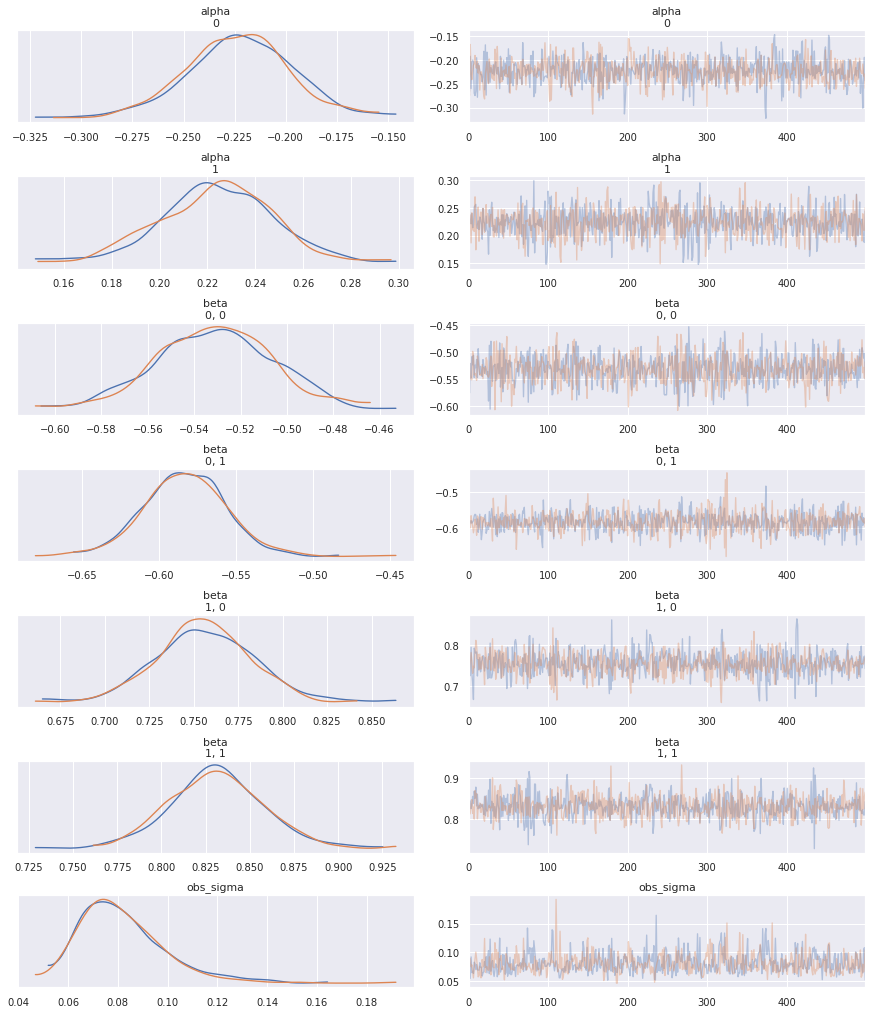

In [117]:
# model 4 : two 'countries or houses with differing energy consumption, second has 10% more'

x0 = df_all['out_std'].values
x1 = df_all['in_std'].values 

country_idx = df_all['country_idx'].values

result = pd.DataFrame()
summary = pd.DataFrame()

model_4 = pm.Model()
with model_4:
    
    alpha = pm.Normal('alpha',0,10,shape=2)
    beta = pm.Normal('beta',0,10,shape=(2,2))
    obs_sigma = pm.Exponential('obs_sigma',1)

    reg = alpha[country_idx] + x0 * beta[0,country_idx] + x1 * beta[1,country_idx] 

    lkh = pm.Normal('lkh',reg,obs_sigma,observed=df_all['e_std'])

    trace = pm.sample(500,tune=500)

    result = pm.trace_to_dataframe(trace)
    
    summary = az.summary(trace,hdi_prob=0.89)
    
    print (result.describe())
    print (summary)
    
    az.plot_trace(trace)

In [118]:
rows = np.random.choice(result.index,replace=True,size=nr_rows)

lines_0 = np.array([result.iloc[rows]['alpha__0'] + result.iloc[rows]['beta__0_0'] * X[i] \
                  + result.iloc[rows]['beta__1_0'] * X[i] for i in range(len(X))])

lines_1 = np.array([result.iloc[rows]['alpha__1'] + result.iloc[rows]['beta__0_1'] * X[i] \
                  + result.iloc[rows]['beta__1_1'] * X[i] for i in range(len(X))])

/usr/local/lib/python3.8/site-packages/arviz/stats/stats.py:483: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(
/usr/local/lib/python3.8/site-packages/arviz/stats/stats.py:483: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(


<AxesSubplot:xlabel='temp in/out [std]', ylabel='energy [std]'>

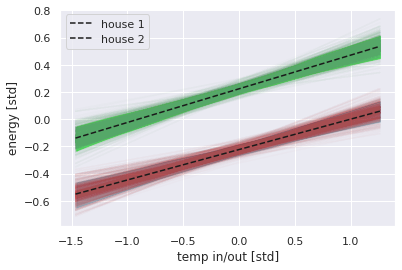

In [119]:
_= plt.plot(X,lines_0,color='r',alpha=0.02)

plt.plot(X,lines_1,color='g',alpha=0.02)


ax = plt.gca()


_= plt.plot(X,result['alpha__0'].mean() + result['beta__0_0'].mean() * X + result['beta__1_0'].mean() * X,
            color='k',ls='dashed',label='house 1')

_= plt.plot(X,result['alpha__1'].mean() + result['beta__0_1'].mean() * X + result['beta__1_1'].mean() * X,
            color='k',ls='dashed',label='house 2')


plt.xlabel('temp in/out [std]')
plt.ylabel('energy [std]')

plt.legend(loc='upper left')

fill_kwargs = {'alpha': 0.5}
az.plot_hpd(X, lines_0.T,ax=ax,color='c',fill_kwargs=fill_kwargs,hdi_prob=0.89)
az.plot_hpd(X, lines_1.T,ax=ax,color='lime',fill_kwargs=fill_kwargs,hdi_prob=0.89)



